In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import chromedriver_binary
import csv
import re
import japanize_matplotlib
import matplotlib.cm as cm

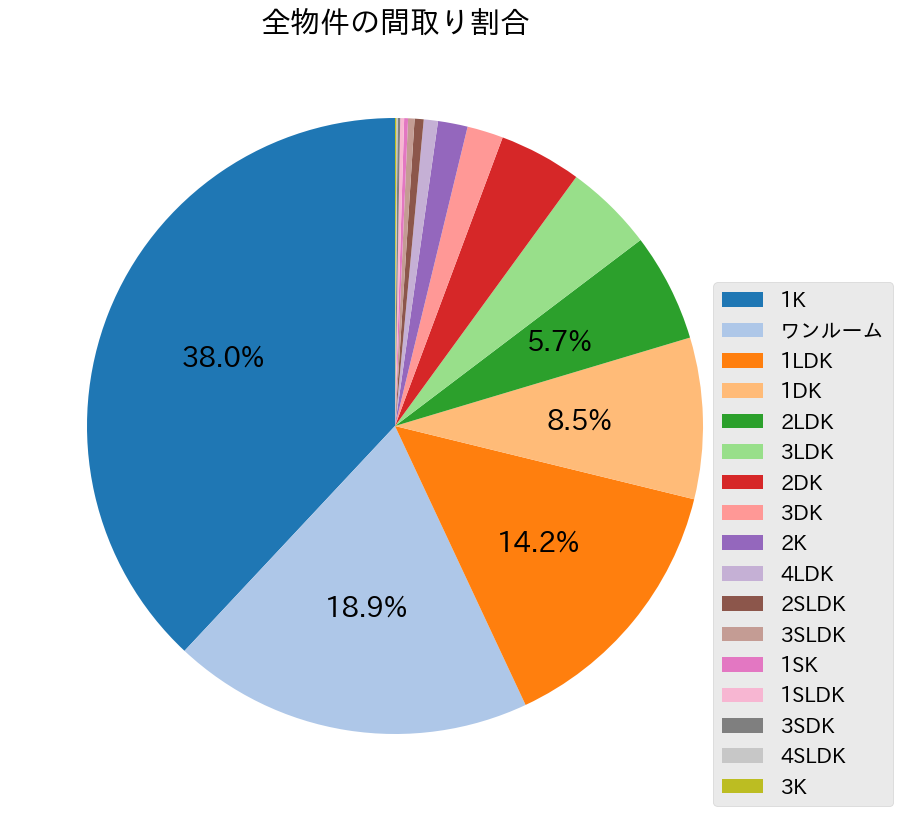

<Figure size 640x480 with 0 Axes>

In [150]:
# 間取りの割合
df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}


plt.title('全物件の間取り割合')
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

plt.pie(df["間取り"].value_counts(),
        textprops=textprops,
        autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
        startangle=90)
plt.legend(df["間取り"].value_counts().index,
           bbox_to_anchor=(0.9, 0.7))

plt.show()

plt.savefig("TEST.png")

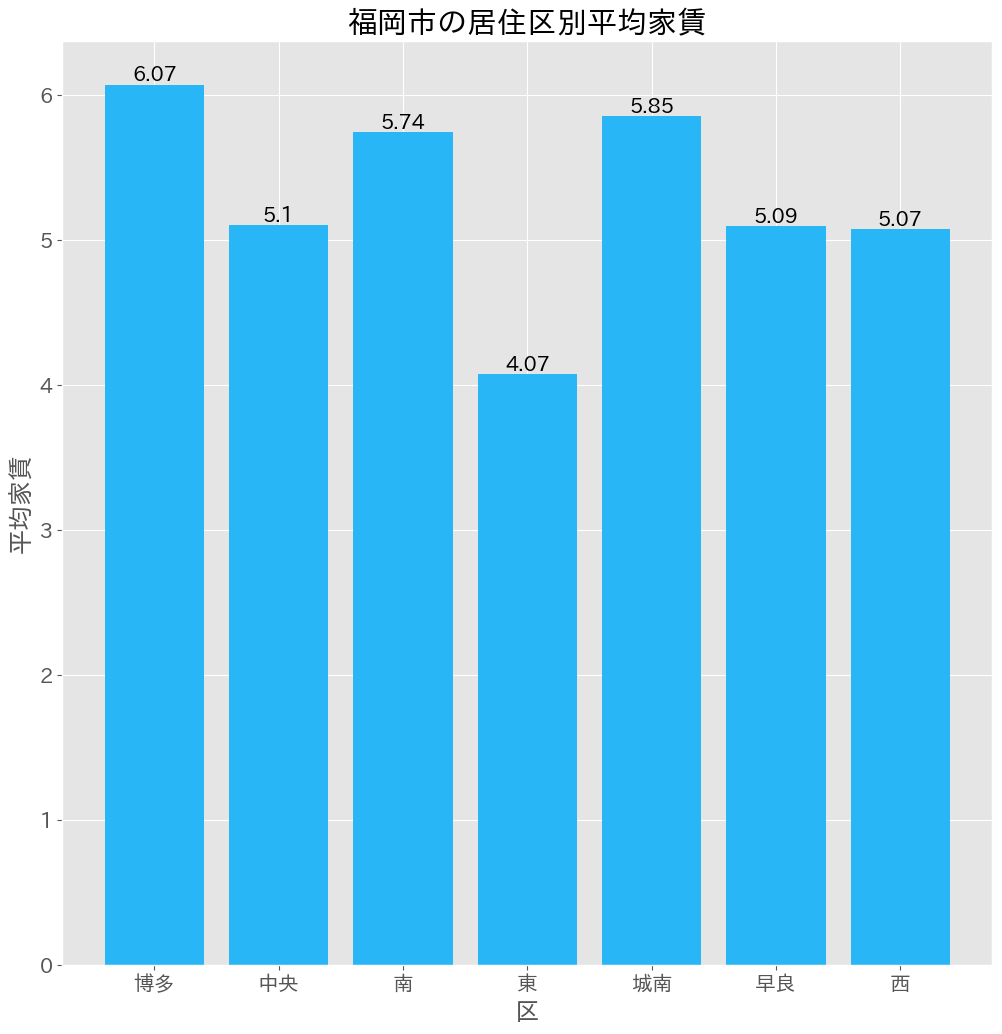

In [148]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))


plt.title('福岡市の居住区別平均家賃')
plt.xlabel('区')
plt.ylabel('平均家賃')
plt.bar(df["市区"].value_counts().index,df.groupby("市区").mean()["家賃"],
        color="#29B6F6")

# 棒グラフ内に数値を書く
for x, y in zip(df["市区"].value_counts().index, df.groupby("市区").mean()["家賃"]):
    y = round(y, 2)
    plt.text(x, y, y, ha='center', va='bottom')
plt.show()

